In [1]:
import pandas as pd
import re
import numpy as np
import string

In [2]:
remedy_file0 = pd.read_csv(r"C:\Users\A174411\Onedrive - Progressive Corporation\groupProject\Custom SQL Query (InformationTechnology)_Custom SQL Query.csv", dtype='object')

In [3]:
remedy_file = remedy_file0.copy(deep=True)
print(remedy_file.shape)
print(remedy_file.columns)

(225491, 12)
Index(['Assignee', 'Priority', 'Record Type', 'RecordID', 'Reported_Time',
       'Resolved_Date', 'Status', 'Status Reason', 'Submission Type',
       'Support_Group', 'Support_Org', 'Text'],
      dtype='object')


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [6]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Error loading stopwords: <urlopen error Tunnel connection
[nltk_data]     failed: 407 Proxy Authentication Required>
[nltk_data] Error loading punkt: <urlopen error Tunnel connection
[nltk_data]     failed: 407 Proxy Authentication Required>
[nltk_data] Error loading wordnet: <urlopen error Tunnel connection
[nltk_data]     failed: 407 Proxy Authentication Required>
[nltk_data] Error loading omw-1.4: <urlopen error Tunnel connection
[nltk_data]     failed: 407 Proxy Authentication Required>


False

In [7]:
# REPLACES NULL WITH NaN
remedy_file['Text'].replace('', np.nan, inplace=True)
#remedy_file.head()

# DROPS NaN
remedy_file.dropna(subset=['Text'], inplace=True)
remedy_file.head()

,Assignee,Priority,Record Type,RecordID,Reported_Time,Resolved_Date,Status,Status Reason,Submission Type,Support_Group,Support_Org,Text
6,William G Pritchard,High,Incident,INC000012547401,5/14/2022 3:35,5/14/2022 7:15,Closed,Automated Resolution Reported,Automated,Systems & Infrastructure T2,Computing,<SERVER> Reported no UF data for past hour
7,William G Pritchard,High,Incident,INC000012547622,5/14/2022 5:36,5/14/2022 6:11,Closed,Automated Resolution Reported,Automated,Systems & Infrastructure T2,Computing,<SERVER> Reported no UF data for past hour
8,William G Pritchard,High,Incident,INC000012493989,4/27/2022 6:25,4/27/2022 8:59,Closed,Automated Resolution Reported,Automated,Systems & Infrastructure T2,Computing,No KBA found for this. Received help from Ben ...
9,William G Pritchard,High,Incident,INC000012493991,4/27/2022 6:25,4/27/2022 8:59,Closed,Automated Resolution Reported,Automated,Systems & Infrastructure T2,Computing,No KBA found for this. Received help from Ben ...
10,William G Pritchard,High,Incident,INC000012480898,4/23/2022 5:39,4/23/2022 5:51,Closed,Automated Resolution Reported,Automated,Systems & Infrastructure T2,Computing,"No KBA in existence for this issue, but INC000..."


In [8]:
# CLEANS THE TEXT
# clean_remedy_file = remedy_file.translate(str.maketrans('', '', string.punctuation)) #Error. 'DataFrame' object has no attribute 'translate'

remedy_file["clean_remedy_file"] = remedy_file['Text'].str.replace('[^\w\s]',' ') #works!
remedy_file["clean_remedy_file"]

c:\miniconda37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


6                 SERVER  Reported no UF data for past hour
7                 SERVER  Reported no UF data for past hour
8         No KBA found for this  Received help from Ben ...
9         No KBA found for this  Received help from Ben ...
10        No KBA in existence for this issue  but INC000...
                                ...                        
225476    HOBICDBD HOBICRDV OBIDBD03 ARCHIVELOG 20210428...
225477                     Health Check on S65AA338 Server 
225478                    Please reboot DMZ server SMVQWP2D
225479    Verifying cabling reseat if necessary for devi...
225483    Per Cloud Ops  David Garcia  Event Monitoring ...
Name: clean_remedy_file, Length: 155393, dtype: object

In [9]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [55]:
# BREAK ROW STRING INTO INDIVIDUAL WORDS
remedy_file['tokenized_text'] = remedy_file["clean_remedy_file"].apply(word_tokenize)

In [57]:
test_list

6     [SERVER, Reported, no, UF, data, for, past, hour]
7     [SERVER, Reported, no, UF, data, for, past, hour]
8     [No, KBA, found, for, this, Received, help, fr...
9     [No, KBA, found, for, this, Received, help, fr...
10    [No, KBA, in, existence, for, this, issue, but...
11    [No, KBAs, were, used, I, logged, into, acvcsa...
12       [PDWAppliance, SCOM, Reported, Error, Warning]
13       [PDWAppliance, SCOM, Reported, Error, Warning]
14       [PDWAppliance, SCOM, Reported, Error, Warning]
15       [PDWAppliance, SCOM, Reported, Error, Warning]
Name: tokenized_text, dtype: object

In [54]:
# REMOVE STOPWORDS FROM LISTS AND APPEND RESULT TO FILTERED_TEXT
stop_words = set(stopwords.words('english'))
word_tokens = remedy_file['tokenized_text']
test_list = word_tokens[:10]
# test_list = ['a', 'the', 'dog', 'cat', 'bus']
filtered_comments = []

counter = 0

# for each comment (list)
for comment in test_list:
#for comment in work_tokens:
    counter += 1
    print('Comment counter', counter)
    print('comment', comment)
    # make an empty list to hold the nonstopwords of the specific comment 
    filtered_words = []
    # for each individual word in the comment list
    for word in comment:
    # if the individual word in the current comment is NOT a stop word, add it the filtered_words list
        print("word:", word)
        if str(word).lower() not in stop_words: 
            filtered_words.append(word)
    print('finished parsing commment, final ftilered words list of this specifc comment:', filtered_words,)
    filtered_comments.append(filtered_words)
    print("main comment list", filtered_comments)
    print()
#filtered_Text

Comment counter 1
comment ['SERVER', 'Reported', 'no', 'UF', 'data', 'for', 'past', 'hour']
word: SERVER
word: Reported
word: no
word: UF
word: data
word: for
word: past
word: hour
finished parsing commment, final ftilered words list of this specifc comment: ['SERVER', 'Reported', 'UF', 'data', 'past', 'hour']
main comment list [['SERVER', 'Reported', 'UF', 'data', 'past', 'hour']]

Comment counter 2
comment ['SERVER', 'Reported', 'no', 'UF', 'data', 'for', 'past', 'hour']
word: SERVER
word: Reported
word: no
word: UF
word: data
word: for
word: past
word: hour
finished parsing commment, final ftilered words list of this specifc comment: ['SERVER', 'Reported', 'UF', 'data', 'past', 'hour']
main comment list [['SERVER', 'Reported', 'UF', 'data', 'past', 'hour'], ['SERVER', 'Reported', 'UF', 'data', 'past', 'hour']]

Comment counter 3
comment ['No', 'KBA', 'found', 'for', 'this', 'Received', 'help', 'from', 'Ben', 'Reed', 'instead', 'Created', 'Splunk', 'block', 'drained', 'in', 'LTM', 'R

In [59]:
flat_list = []

for lists in filtered_comments:
    for words in lists:
        flat_list.append(words)
#flat_list

In [ ]:
# Need word lemmenization / stemming

In [26]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

In [30]:
fdist = FreqDist(flat_list)
fdist

FreqDist({'Reported': 6, 'server': 5, 'LTM': 4, 'PDWAppliance': 4, 'SCOM': 4, 'Error': 4, 'Warning': 4, 'KBA': 3, 'found': 3, 'RDP': 3, ...})

In [ ]:
fdist.most_common(2)

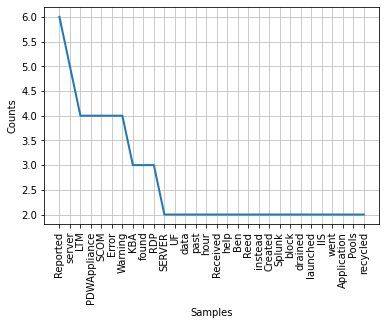

In [31]:
fdist.plot(30 , cumulative=False)
plt.show()
# consider using a bar graph instead

In [ ]:
# sentiment analysis(?)